### simple linear regression

![Screenshot 2024-05-21 191916.png](<attachment:Screenshot 2024-05-21 191916.png>)
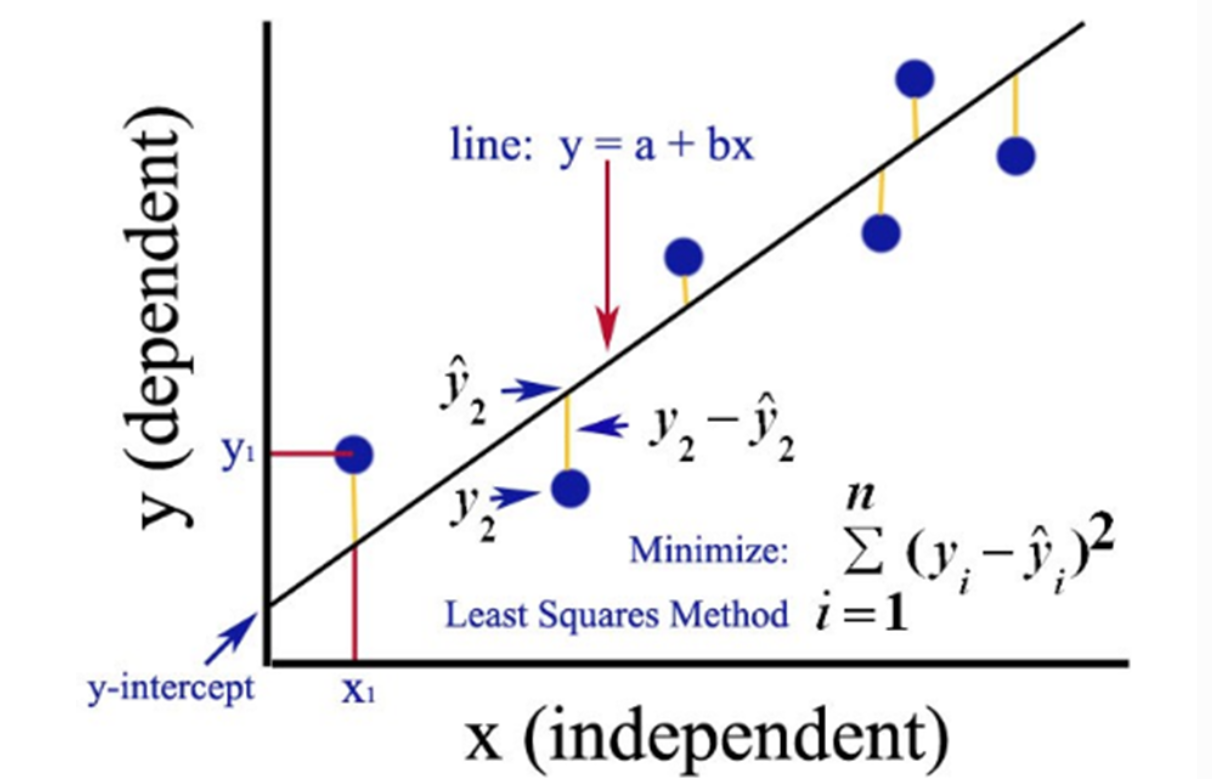

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read dataset

In [15]:
import pandas as pd
df=pd.read_csv('50_Startups (4).csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Perform Basic data quality checks

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [4]:
df.duplicated().sum()

0

### Seperate X(RND) and Y(PROFIT)

seprated x ,rnd and y profit 

In [5]:
x=df[["RND"]]
y=df[["PROFIT"]]

In [6]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [7]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

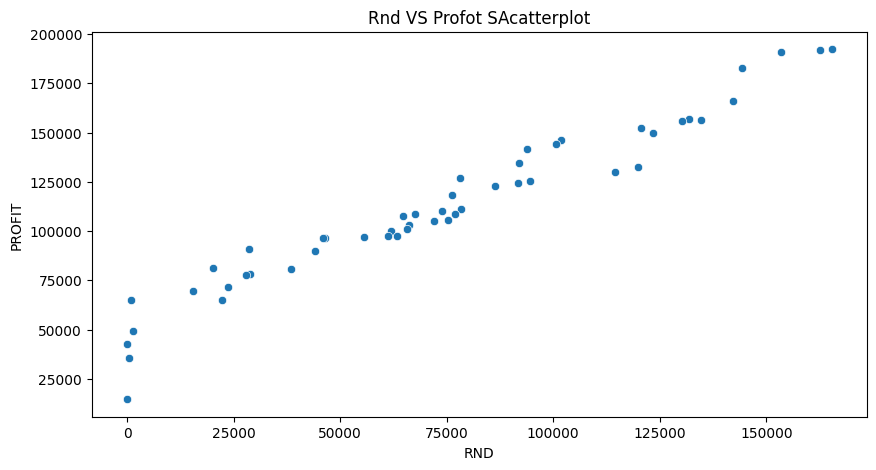

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="RND",y="PROFIT")
plt.title("Rnd VS Profot SAcatterplot")
plt.show()

### Build the Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [18]:

model.intercept_

array([49032.89914125])

In [19]:

model.coef_

array([[0.85429137]])

PROFIT_pred = 0.8542*RND + 49032.90

###  Evaluate the model

In [13]:
model.score(x,y)

0.9465353160804393

In [20]:
#estimate profit
ypred=model.predict(x)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [22]:

y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, ypred)
print(f'Mean Squared Error (MSE) : {mse:.2f}')

Mean Squared Error (MSE) : 85120931.33


In [25]:

rmse = mse**(1/2)
print(f'Root Mean Squared Error : {rmse:.2f}')

Root Mean Squared Error : 9226.10


In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, ypred)
print(f'Mean Absolute Error (MAE) : {mae:.2f}')

Mean Absolute Error (MAE) : 6910.98


In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y, ypred)
print(f'Mean Absoute Percentage Error (MAPE) : {mape*100:.2f} %')

Mean Absoute Percentage Error (MAPE) : 11.07 %


In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y, ypred)
print(f'R2 score : {r2:.4f}')

R2 score : 0.9465


Because R2 score is 0.9456 > 0.8 it is a very good model
Visualizing straight line fit


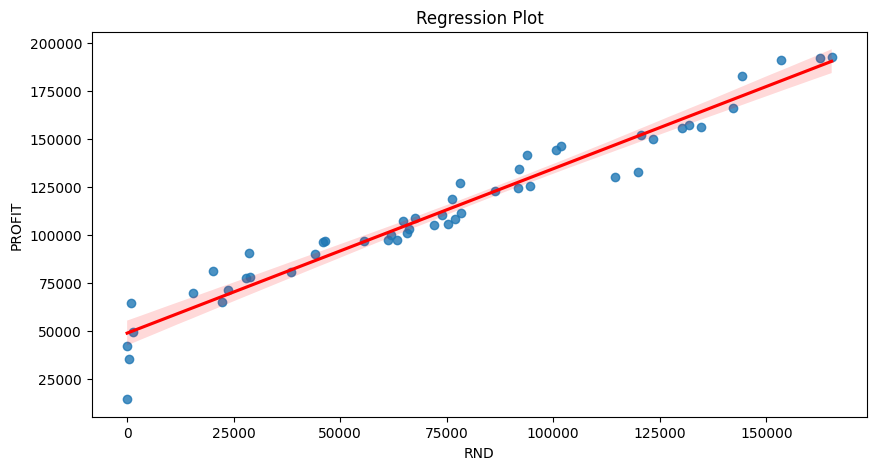

In [32]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='RND', y='PROFIT', line_kws={'color':'red'})
plt.title('Regression Plot')
plt.show()


Predicting out of sample data

In [33]:
rnd = [[110000]]
profit_est = model.predict(rnd)[0][0]
print(f'Estimated Profit is : {profit_est:.2f}')

Estimated Profit is : 143004.95


c:\Users\komal\OneDrive\Desktop\wakad ML\repository\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
